# Análisis de regresión práctica
Katlyn Goeujon-Mackness <br>
26/02/2025 <br>
**Descripción:** Un espacio para practicar el análisis de regresión

## Estructura
### Modelo de regresión lineal múltiple
* Extender el modelo de **regresión lineal simple** a uno que incluye múltiples variables independientes
* Utilizar la técnica de **mínimos cuadrados** para minimizar la suma de los residuales al cuadrado
* Entender conceptos clave como el coeficiente de determinación **R cuadrado**

### Análisis de datos con Python
* Realizar **cálculos manuales** de regresión lineal utilizando Python
* Manejar matrices

### Cálculo de sumas de cuadrados y R²
* Explorar cómo calcular la Suma Total de Cuadrados **(TSS)**, la Suma Explicada de Cuadrados **(ESS)** y la Suma de Cuadrados de los Residuales **(RSS)**
* Entender el coeficiente de determinación R cuadrada y su versión ajustada

In [54]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [55]:
data_vw = pd.read_csv("Data/vw.csv")
data_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [56]:
# Seleccionar columnas relevantes
data_vw["Intercepto"] = 1
data_vw = data_vw[["Intercepto", "year", "mileage", "tax", "mpg", "engineSize", "price"]]
print(data_vw.shape)
data_vw.head()

(15157, 7)


,Intercepto,year,mileage,tax,mpg,engineSize,price
0,1,2019,13904,145,49.6,2.0,25000
1,1,2019,4562,145,49.6,2.0,26883
2,1,2019,7414,145,50.4,2.0,20000
3,1,2019,4825,145,32.5,2.0,33492
4,1,2019,6500,150,39.8,1.5,22900


In [57]:
# Separar datos en valores X y Y
Xdata = data_vw[["Intercepto", "year", "mileage", "tax", "mpg", "engineSize"]].values
Ydata = data_vw[["price"]].values

In [58]:
# Dividir en bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.30, random_state=1)

In [59]:
X = X_train
Y = Y_train

In [60]:
# Número de renglones en Matriz X (Base de entrenamiento)
X.shape[0]

10609

In [61]:
# Número de columnas en Matriz Y (Base de entrenamiento)
X.shape[1]

6

In [62]:
# Opción de formato numérico
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [63]:
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X

array([[10609.000000, 21401194.000000, 233072420.000000, 1193210.000000,
        570957.800000, 16961.200000],
       [21401194.000000, 43171982552.000000, 469825148996.000000,
        2407544625.000000, 1151684648.600000, 34215355.100000],
       [233072420.000000, 469825148996.000000, 9876827808602.000000,
        21390578815.000000, 13579651182.000000, 383760914.600000],
       [1193210.000000, 2407544625.000000, 21390578815.000000,
        176634550.000000, 59476762.000000, 1996151.500000],
       [570957.800000, 1151684648.600000, 13579651182.000000,
        59476762.000000, 32738157.620000, 894313.710000],
       [16961.200000, 34215355.100000, 383760914.600000, 1996151.500000,
        894313.710000, 29370.320000]])

In [64]:
XT_X_inv = np.linalg.inv(XT_X)
XT_X_inv

array([[234.232849, -0.116082, -0.000008, 0.000486, 0.000301, 0.026142],
       [-0.116082, 0.000058, 0.000000, -0.000000, -0.000000, -0.000013],
       [-0.000008, 0.000000, 0.000000, 0.000000, -0.000000, -0.000000],
       [0.000486, -0.000000, 0.000000, 0.000000, 0.000000, -0.000001],
       [0.000301, -0.000000, -0.000000, 0.000000, 0.000001, 0.000004],
       [0.026142, -0.000013, -0.000000, -0.000001, 0.000004, 0.000536]])

In [65]:
XT_Y = np.matmul(np.matrix.transpose(X), Y)
XT_Y

array([[178787650.000000],
       [360765026860.000000],
       [3030266210110.000000],
       [22654766005.000000],
       [9057032319.599981],
       [307851287.700000]])

In [66]:
betas = np.matmul(XT_X_inv, XT_Y)
betas

array([[-3014834.951095],
       [1498.128055],
       [-0.081003],
       [4.531650],
       [-75.638175],
       [9321.335395]])

In [67]:
# Cálculo de TSS (Suma total de cuadrados)
TSS = np.matmul(np.matrix.transpose(Y), Y) - len(Y) * (Y.mean()**2)
TSS


array([[643899084866.517090]])

In [68]:
# Cálculo de ESS (Suma explicada de cuadrados)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X, betas)) - len(Y)*(Y.mean()**2)
ESS

array([[485672811210.117188]])

In [69]:
# Cálculo de RSS (Residuales al cuadrado)
RSS = TSS - ESS
RSS

array([[158226273656.399902]])

In [70]:
# Cálculo del Coeficiente de Determinación R Cuadrada
RSq = 1 - RSS / TSS
RSq

array([[0.754269]])

In [71]:
# Cálculo del Coeficiente de Determinación R Cuadrada Ajustada
RSqAj = 1 - (RSS / (X.shape[0] - X.shape[1])) / (TSS / (X.shape[0] - 1))
RSqAj

array([[0.754153]])

In [72]:
# Reporte Automatizado de la regresión en Python
import statsmodels.api as sm

regressor = sm.OLS(Y, X).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     6509.
Date:                Wed, 12 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:23:37   Log-Likelihood:            -1.0267e+05
No. Observations:               10609   AIC:                         2.054e+05
Df Residuals:                   10603   BIC:                         2.054e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.015e+06   5.91e+04    -50.993      0.0

In [73]:
# Aplicación sobre la base de prueba 
Y_pred = np.matmul(X_test, betas)
Y_pred

array([[15818.921412],
       [20337.998952],
       [14114.679328],
       ...,
       [13048.907606],
       [16477.740017],
       [25371.972582]], shape=(4548, 1))

In [74]:
# Cálculo de residuales
Resid = Y_test - Y_pred
Resid

array([[181.078588],
       [-2839.998952],
       [16884.320672],
       ...,
       [-3558.907606],
       [17.259983],
       [2617.027418]], shape=(4548, 1))

array([[<Axes: title={'center': '0'}>]], dtype=object)

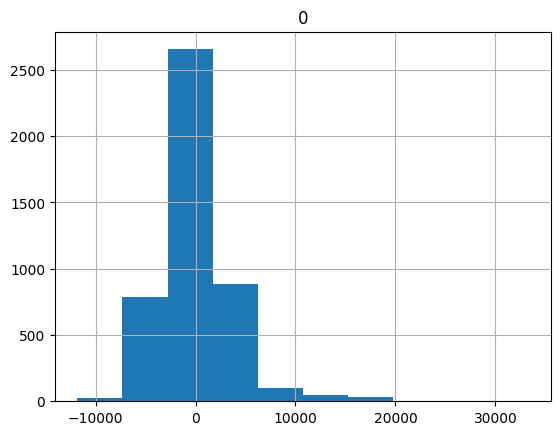

In [76]:
# Gráfico del histograma de residuales para la base de prueba
df = pd.DataFrame(Resid)
df.hist()

In [77]:
from sklearn.metrics import r2_score
from sklearn import metrics

print("Coeficiente R cuadrado", r2_score(Y_test, Y_pred))

Coeficiente R cuadrado 0.7600191786837438
